<a href="https://colab.research.google.com/github/sialf/ML_Group_1/blob/main/Mobile_Phone_Price_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Group 1 Project - Mobile Phone Price Predictions**

## **1. Problem and Dataset Selection**

##### **Project Objective**
Our group project objective is to predict the price of a phone based on its features.


##### **Methodology**
We will use a dataset containing various features of existing phones to train a regression analysis based machine learning model in order to predict the price of a new phone.


##### **Dataset**
The dataset we will be using to build our ML model is from Kaggle: https://www.kaggle.com/datasets/rkiattisak/mobile-phone-price?resource=download

##### **Dataset Variables**
The (uncleaned) dataset variables include:
* **Brand:** the manufacturer of the phone
* **Model:** the name of the phone model
* **Storage (GB):** the amount of storage space (in gigabytes) available on the phone
* **RAM (GB):** the amount of RAM (in gigabytes) available on the phone
* **Screen Size (inches):** the size of the phone's display screen in inches
* **Camera (MP):** the megapixel count of the phone's rear camera(s)
* **Battery Capacity (mAh):** the capacity of the phone's battery in milliampere hours
* **Price ($):** the retail price of the phone in US dollars

We deemed these appropriate feature variables for determining the factors that influence the price of a phone. Thorough exploration of the feature variables used for testing can be found below in the Data Processing section.

## **2.  Data Preprocessing**

Upon loading the relevant libraries and loading the dataset via url link to our group repository, where we have placed the dataset, we can then assess the data available. And then we can determine the preprocessing procedures.

In [1]:
# Import all libraries needed for the project

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RepeatedKFold
import re

In [2]:
# Loading the data, via GitHub repository. Please update the url as the token expires after some time.

url=("https://raw.githubusercontent.com/sialf/ML_Group_1/main/Mobile%20phone%20price.csv?token=GHSAT0AAAAAACUZD4ABA3K2ZPP7EOWHAEEKZU3RIHA")
raw_data = pd.read_csv(url)

In [3]:
# Displaying first 5 rows of the data

raw_data.head()

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
0,Apple,iPhone 13 Pro,128 GB,6 GB,6.1,12 + 12 + 12,3095,999
1,Samsung,Galaxy S21 Ultra,256 GB,12 GB,6.8,108 + 10 + 10 + 12,5000,1199
2,OnePlus,9 Pro,128 GB,8 GB,6.7,48 + 50 + 8 + 2,4500,899
3,Xiaomi,Redmi Note 10 Pro,128 GB,6 GB,6.67,64 + 8 + 5 + 2,5020,279
4,Google,Pixel 6,128 GB,8 GB,6.4,50 + 12.2,4614,799


#### **Data Cleaning**

The data cleaning procedures we have taken below are as follows:
* **Determine if there are any missing values in our variables.**
* **Removing the model name column.** We inspected the data and found that almost all phone entries are of a different model, which may not help in finding a pattern between model and price. We therefore decided to remove this column. The variable Brand, however, is similar and more effective, as there are groups phones of the same brand, making it more valuable for analysis.
* **Removing units from Storage & RAM varible entries.** In order to then convert the strings to integers so analysis can be performed.  
* **Cleaning the Camera (MP) variable.** For this variable, the MP count for all cameras of the phone was placed in 1 column. In order to make this suitable for analysis, whilst also displaying it's impact in a valuable way, we decided to extract the camera with the max MP count, and then also create a new column with the total count of cameras for each phone. This will give us infomration on the phone based on highest MP count, and also total nuber of cameras, which may be important in determining phone price features.
* **Coverted strings to integers.** For columns in order to be suitable for numerical analysis.
* **Converted screen size unit from inches to cm.**
* **Checking how many phones there are for each brand, and removing brands that have 2 or less phone entries.** This is so any average values won't be skewed due to large variance in data for each brand.
* **Removing any 'extreme cases'**. E.g. phone with much lower price compared to the others. Again, so any average values won't be skewed due to large variance in data for each brand.

After this, the dataset will then be renamed to signify that it has been cleaned and ready for analysis.

In [4]:
# Check for missing values

missing = raw_data.isnull().sum()
print(missing)

Brand                     0
Model                     0
Storage                   0
RAM                       0
Screen Size (inches)      0
Camera (MP)               0
Battery Capacity (mAh)    0
Price ($)                 0
dtype: int64


In [5]:
# Removing the model name column

raw_data_dropped = raw_data.drop(columns=['Model'])

In [6]:
# Displaying first 5 rows of the data, given the changes above

raw_data_dropped.head()

,Brand,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
0,Apple,128 GB,6 GB,6.1,12 + 12 + 12,3095,999
1,Samsung,256 GB,12 GB,6.8,108 + 10 + 10 + 12,5000,1199
2,OnePlus,128 GB,8 GB,6.7,48 + 50 + 8 + 2,4500,899
3,Xiaomi,128 GB,6 GB,6.67,64 + 8 + 5 + 2,5020,279
4,Google,128 GB,8 GB,6.4,50 + 12.2,4614,799


In [7]:
# Removing the GB from Storage column and converting string to integer

raw_data_dropped['Storage '] = raw_data_dropped['Storage '].str.extract(r'(\d+)').astype(int)

In [8]:
# Removing the GB from RAM column and converting string to integer

raw_data_dropped['RAM '] = raw_data_dropped['RAM '].str.extract(r'(\d+)').astype(int)

In [9]:
# Displaying first and last 5 rows of the data, given the changes above

raw_data_dropped

,Brand,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
0,Apple,128,6,6.1,12 + 12 + 12,3095,999
1,Samsung,256,12,6.8,108 + 10 + 10 + 12,5000,1199
2,OnePlus,128,8,6.7,48 + 50 + 8 + 2,4500,899
3,Xiaomi,128,6,6.67,64 + 8 + 5 + 2,5020,279
4,Google,128,8,6.4,50 + 12.2,4614,799
...,...,...,...,...,...,...,...
402,Samsung,128,8,6.7,12+64+12,4300,1049
403,Xiaomi,128,6,6.57,48+8+2+2,4160,349
404,Apple,128,6,6.7,12+12+12,3687,1099
405,Oppo,128,8,6.4,48+13+8+2,4025,429


In [10]:
# Function to clean and convert camera MP values to integers

def clean_camera_value(value):
    value = str(value).strip()  # Ensure the value is a string and strip any surrounding whitespace
    if pd.isnull(value) or value == '':
        return 0
    numeric_value = ''.join(filter(str.isdigit, value))
    return int(numeric_value) if numeric_value else 0

In [11]:
# Split the Camera (MP) column into individual cameras

camera_split = raw_data_dropped['Camera (MP)'].str.split('+', expand=True)

In [12]:
# Apply the function to each split camera column

camera_split = camera_split.applymap(clean_camera_value)

In [13]:
# Displaying the Camera (MP) values, now split

camera_split

,0,1,2,3
0,12,12,12,0
1,108,10,10,12
2,48,50,8,2
3,64,8,5,2
4,50,122,0,0
...,...,...,...,...
402,12,64,12,0
403,48,8,2,2
404,12,12,12,0
405,48,13,8,2


In [14]:
# Calculate the Main # Ensure all values are integers

camera_split = camera_split.astype(int)

In [15]:
# Calculate the Main Camera (MP) and Number of Cameras

raw_data_dropped['Main Camera (MP)'] = camera_split[0]
raw_data_dropped['Number of Cameras'] = camera_split.apply(lambda x: (x > 0).sum(), axis=1)

In [16]:
# Drop the original Camera (MP) column

raw_data_dropped = raw_data_dropped.drop(columns=['Camera (MP)'])

In [17]:
# Displaying first and last 5 rows of the data, given the changes above

raw_data_dropped

,Brand,Storage,RAM,Screen Size (inches),Battery Capacity (mAh),Price ($),Main Camera (MP),Number of Cameras
0,Apple,128,6,6.1,3095,999,12,3
1,Samsung,256,12,6.8,5000,1199,108,4
2,OnePlus,128,8,6.7,4500,899,48,4
3,Xiaomi,128,6,6.67,5020,279,64,4
4,Google,128,8,6.4,4614,799,50,2
...,...,...,...,...,...,...,...,...
402,Samsung,128,8,6.7,4300,1049,12,3
403,Xiaomi,128,6,6.57,4160,349,48,4
404,Apple,128,6,6.7,3687,1099,12,3
405,Oppo,128,8,6.4,4025,429,48,4


In [18]:
# Remove $ symbol and convert the price column to int

raw_data_dropped['Price ($)'] = raw_data_dropped['Price ($)'].str.replace('$', '').str.replace(',', '').astype(int)


# Verify the changes

print(raw_data_dropped['Price ($)'].head())
print(raw_data_dropped['Price ($)'].dtype)

0     999
1    1199
2     899
3     279
4     799
Name: Price ($), dtype: int64
int64


In [19]:
# Removing spaces, converting to lowercase, replacing spaces with underscores, and removing brackets for column names

raw_data_dropped.columns = raw_data_dropped.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [20]:
# Displaying coloumn names, given the above

raw_data_dropped.columns

Index(['brand', 'storage', 'ram', 'screen_size_inches', 'battery_capacity_mah',
       'price_$', 'main_camera_mp', 'number_of_cameras'],
      dtype='object')

A function was created to convert from inches to cm for better data manipulation. Interestingly, the restriction of decimal places negatively impacted the model so it was extended to 5 decimal places.

In [21]:
# Function to convert screen size values from inches to cm

def inches_to_cm(inches):
    try:
        # Extract number and convert to float
        inches_float = float(re.search(r'[\d\.]+', inches).group())
        # Convert inches to centimeters.
        cm = round(inches_float * 2.54, 5)
        return cm
    except (AttributeError, ValueError):
        return None  # Return None for non-numeric or invalid values

In [22]:
# Apply conversion function to screen_size column

raw_data_dropped['screen_size_inches'] = raw_data_dropped['screen_size_inches'].apply(inches_to_cm)

In [23]:
# Renaming columns again to cleaner format. The decision was made to not use slug case for easy visualisation.

raw_data_dropped.rename(columns={'brand': 'Brand', 'price_$': 'Price ($)', 'storage': 'Storage', 'ram': 'RAM', 'screen_size_inches': 'Screen Size (cm)', 'battery_capacity_mah': 'Battery Capacity (mAh)', 'main_camera_mp': 'Main Camera (MP)', 'number_of_cameras': 'Number of Cameras'}, inplace=True)

In [24]:
# Checking new screen size values after applying conversion function

print(raw_data_dropped['Screen Size (cm)'])

0      15.4940
1      17.2720
2      17.0180
3      16.9418
4      16.2560
        ...   
402    17.0180
403    16.6878
404    17.0180
405    16.2560
406    17.0180
Name: Screen Size (cm), Length: 407, dtype: float64


In [25]:
# Check for duplicates

raw_data_dropped[raw_data_dropped.duplicated()]

,Brand,Storage,RAM,Screen Size (cm),Battery Capacity (mAh),Price ($),Main Camera (MP),Number of Cameras
45,Apple,64,4,13.7160,2227,699,12,2
61,Xiaomi,64,4,16.5100,5000,199,48,3
62,Apple,64,3,11.9380,1821,399,12,1
65,Samsung,128,6,16.5100,4500,449,64,4
77,Apple,128,4,15.4940,2815,799,12,2
...,...,...,...,...,...,...,...,...
387,Samsung,128,8,15.7480,4000,799,64,3
389,Xiaomi,128,4,16.5862,6000,199,48,4
390,Google,128,8,15.2400,4080,699,122,2
398,Samsung,128,6,16.5100,4500,449,64,4


In [26]:
# Removing duplicates

raw_data_dropped = raw_data_dropped.drop_duplicates()

In [27]:
# Check to see all duplicates have been dropped

raw_data_dropped[raw_data_dropped.duplicated()]

,Brand,Storage,RAM,Screen Size (cm),Battery Capacity (mAh),Price ($),Main Camera (MP),Number of Cameras


In [28]:
# Grouping the phones by brand to determine the count

phones_in_brand = raw_data_dropped.groupby('Brand').size().reset_index(name='Count')

print(phones_in_brand)

         Brand  Count
0        Apple     23
1         Asus      4
2   Blackberry      3
3          CAT      1
4       Google      5
5       Huawei     12
6           LG      3
7     Motorola     21
8        Nokia     24
9      OnePlus     12
10        Oppo     47
11      Realme     40
12     Samsung     56
13        Sony      1
14        Vivo     29
15      Xiaomi     52


Brands 'CAT' and 'Sony' only have 1 data entry so we will remove them. Asus, Blackberry and LG will also be removed has they have less than 5 enteries.

In [29]:
# Removing phones of the brand 'CAT' and 'Sony' as they only have 1 value. Removing Asus, Blackberry and LG as they have less than 5 enteries.

# Listing the brands we want to remove
brands_to_remove = ['CAT', 'Sony', 'Asus', 'Blackberry', 'LG']

# '~' will filter out data entries that have the above brand names
raw_data_dropped = raw_data_dropped[~raw_data_dropped['Brand'].isin(brands_to_remove)]

# Reset the index
raw_data_dropped = raw_data_dropped.reset_index(drop=True)

In [30]:
# Sorting by decending order for price to see what the most expensive phone is.

raw_data_dropped = raw_data_dropped.sort_values(by='Price ($)', ascending=False)

In [31]:
# Displaying first and last 5 rows of the data, given all the data cleaning is now complete

raw_data_dropped

,Brand,Storage,RAM,Screen Size (cm),Battery Capacity (mAh),Price ($),Main Camera (MP),Number of Cameras
296,Samsung,256,12,19.3040,4500,1999,12,3
287,Huawei,512,8,16.7132,4200,1399,50,4
291,Samsung,512,16,17.5260,5000,1399,108,4
236,Samsung,256,12,17.5260,4500,1299,108,3
56,Apple,256,6,17.0180,4352,1299,12,3
...,...,...,...,...,...,...,...,...
222,Realme,32,2,16.5100,5000,99,13,2
201,Realme,32,2,16.5100,5000,99,8,2
211,Realme,32,2,16.5100,5000,99,8,1
52,Realme,32,2,16.5100,5000,99,50,2


The Samsung with the price '1999' will be dropped as it is signficantly higher than all the other prices, and there is no other data around this price point. It will be difficult to validate if the model performs well at that extreme price point as our dataset does not have enough data around that price point.

In [32]:
# Removing the data point of the Samsung phone with the highets price

raw_data_dropped = raw_data_dropped.drop(raw_data_dropped[(raw_data_dropped['Brand'] == 'Samsung') & (raw_data_dropped['Price ($)'] == 1999)].index)

In [33]:
# Index is reset

raw_data_dropped = raw_data_dropped.reset_index(drop=True)

As the cleaning process is now complete, we can finally rename our dataset to represent the fact that it is now cleaned.

In [34]:
# Renaming the dataset and displaying

cleaned_data = raw_data_dropped
cleaned_data

,Brand,Storage,RAM,Screen Size (cm),Battery Capacity (mAh),Price ($),Main Camera (MP),Number of Cameras
0,Huawei,512,8,16.7132,4200,1399,50,4
1,Samsung,512,16,17.5260,5000,1399,108,4
2,Samsung,256,12,17.5260,4500,1299,108,3
3,Apple,256,6,17.0180,4352,1299,12,3
4,Samsung,256,12,17.2720,5000,1199,108,4
...,...,...,...,...,...,...,...,...
315,Realme,32,2,16.5100,5000,99,13,2
316,Realme,32,2,16.5100,5000,99,8,2
317,Realme,32,2,16.5100,5000,99,8,1
318,Realme,32,2,16.5100,5000,99,50,2


## **3.   Exploratory Data Analysis (EDA)**

In this section, we explored the cleaned dataset through statistic calculations and visual displays. This helps us to get a better picture of the data we have in terms of range, features and coorelations. This also helped further in determining the model to use for our predictions.


---



Firstly we found the range in the price of the phones by finding the minimum and maximum price value. This helps us to understand the range of prices in the dataset, which can give insights into the the spread of data.

In [35]:
# Calculating and dsiplaying the min and max phone prices found in the dataset

min_price = cleaned_data['Price ($)'].min()
max_price =  cleaned_data['Price ($)'].max()

print(f"Minimum Price: {min_price}")
print(f"Maximum Price: {max_price}")


Minimum Price: 99
Maximum Price: 1399


There seems to be a reasonable range of the phone prices in the dataset, as 99 dollars and 1399 dollars as minimum and maximum values are a good representation of the phones available today.

We then displayed a histogram of the prices to show its distribution, most and least common prices, and to see if the price data is skewed or if there are any anomalies.

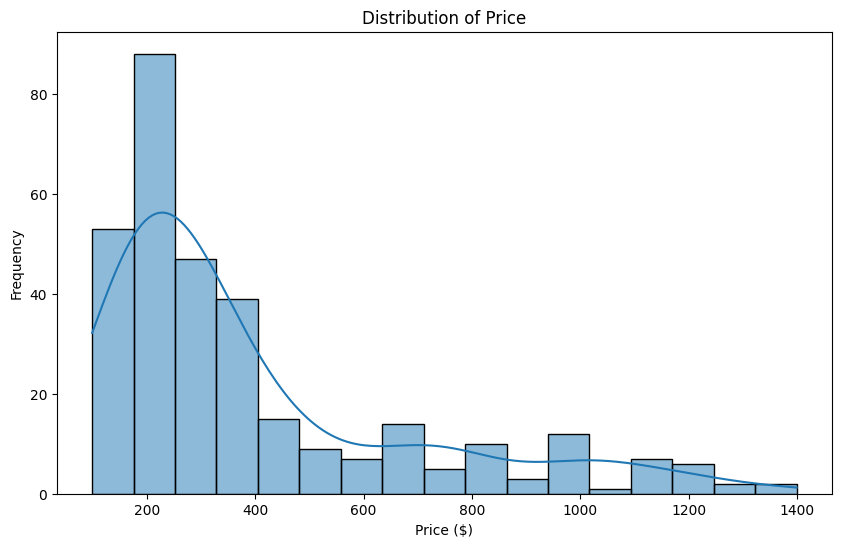

In [36]:
# Function showing the distribution of phone prices

plt.figure(figsize=(10,6))
sns.histplot(cleaned_data['Price ($)'], kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()

One can see that the mobile phone price data is right skewed as more data is concentrated on the left. In general, this is to be expected, as most phones do not exceed the 1000 dollar mark, but generally the newer phones from large brands may exceed this price. The fact that the price data is right skewed will be important when deciding on an ML model, as some models assume a normal distribution of data.

Below, the function goes through the listed phone variables and uses seaborn to make a scatter plot for each variable to see how they relate to phone prices.

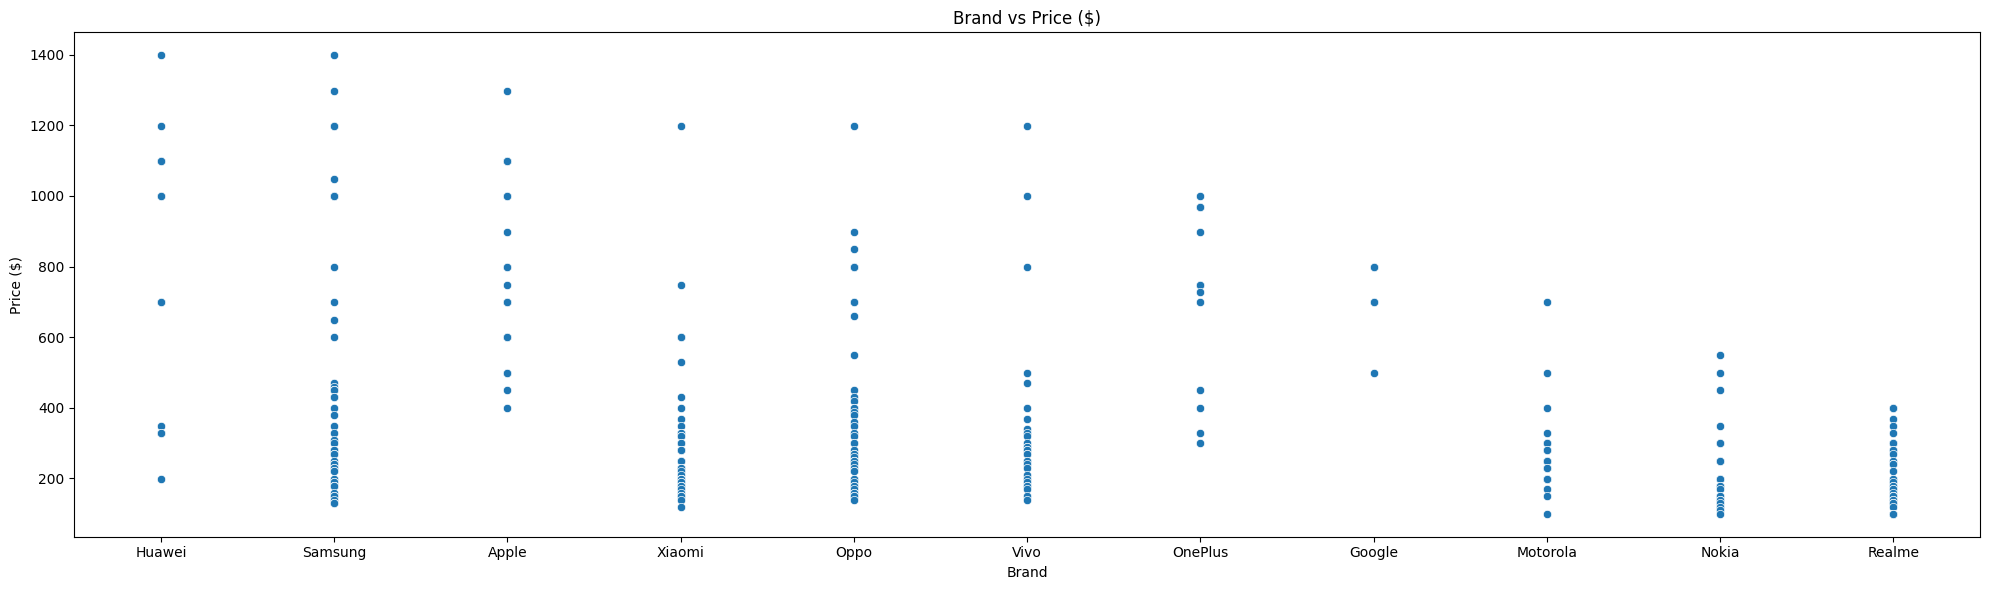

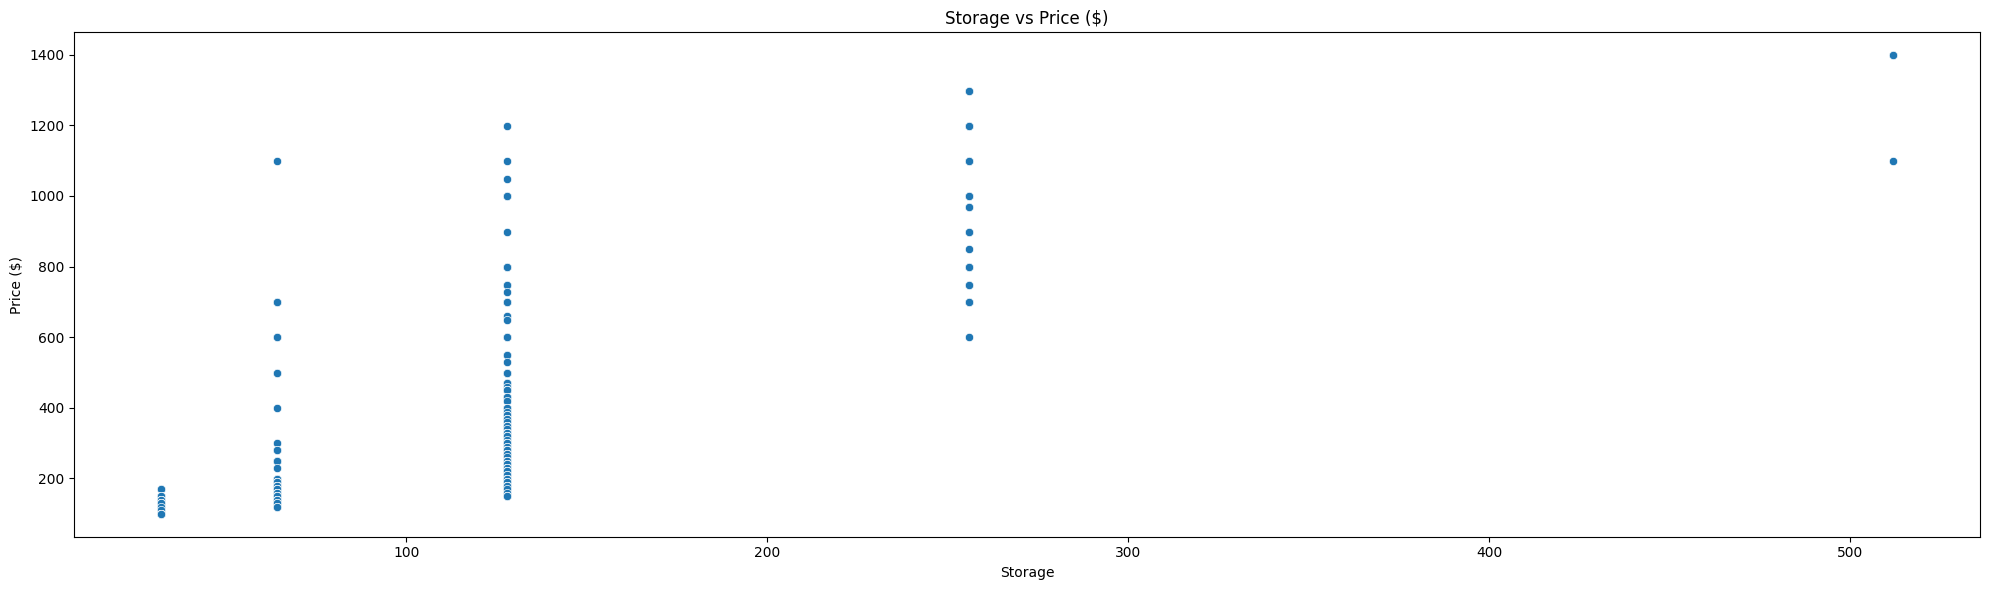

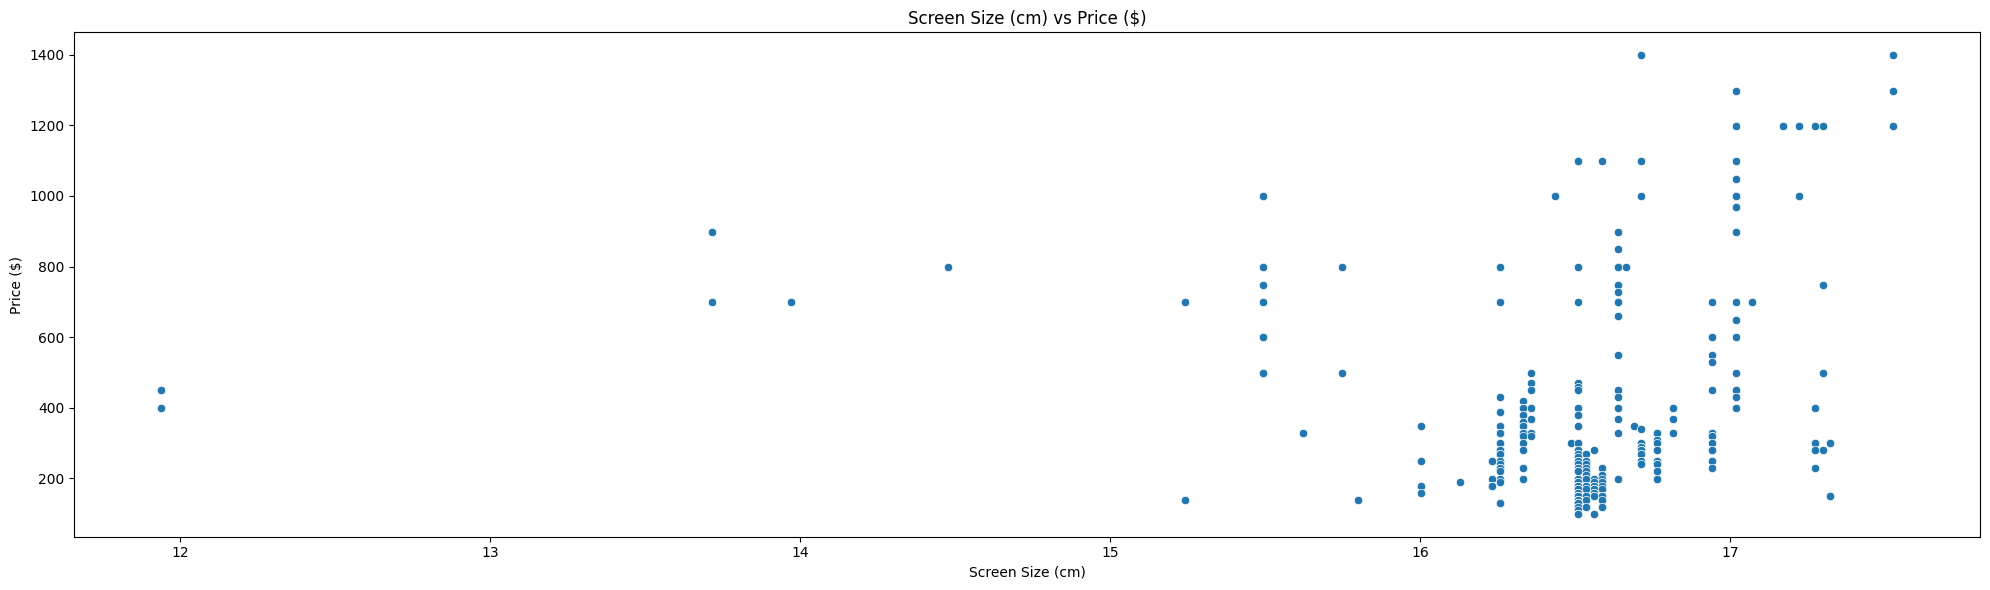

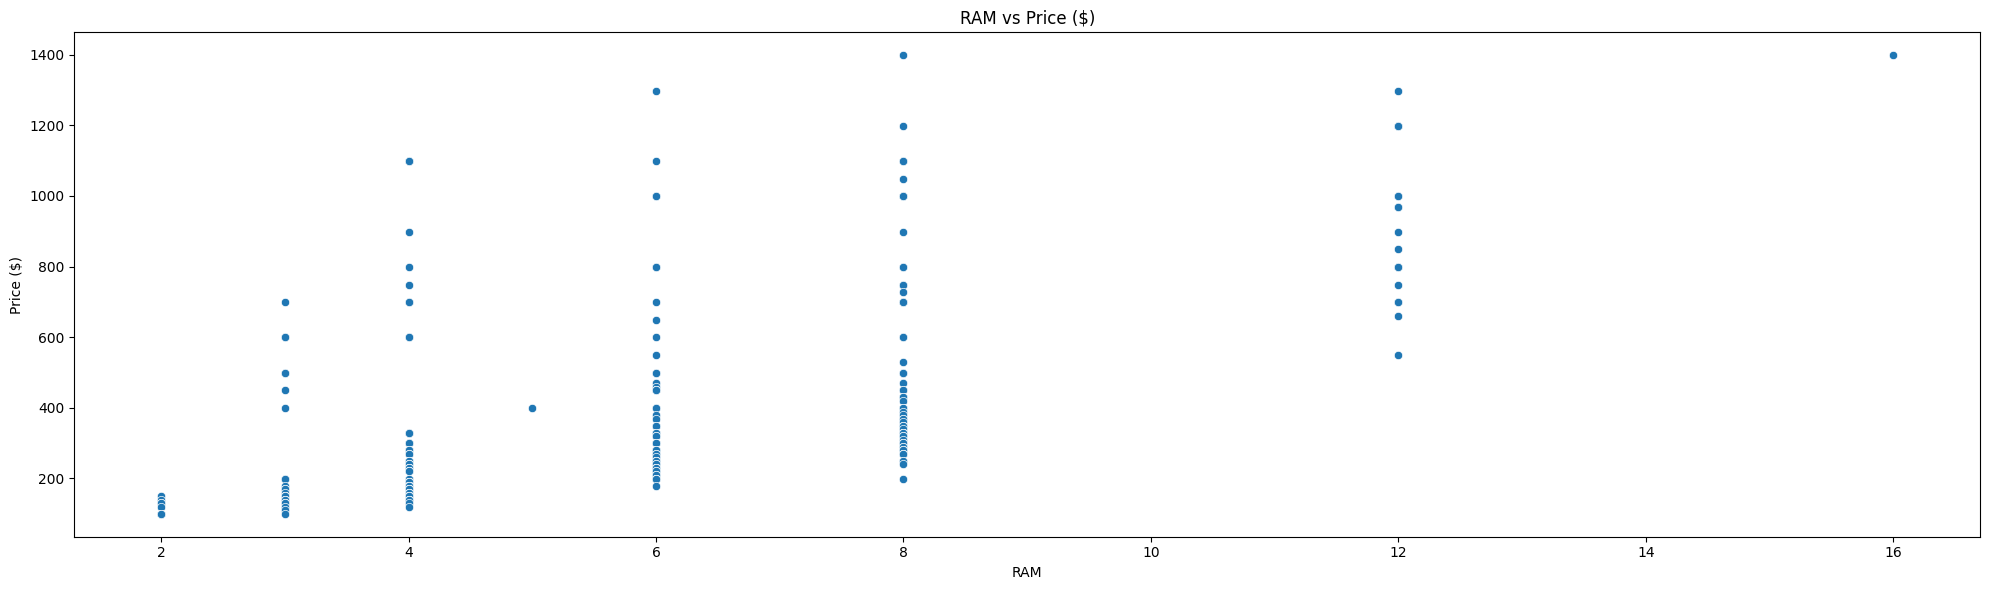

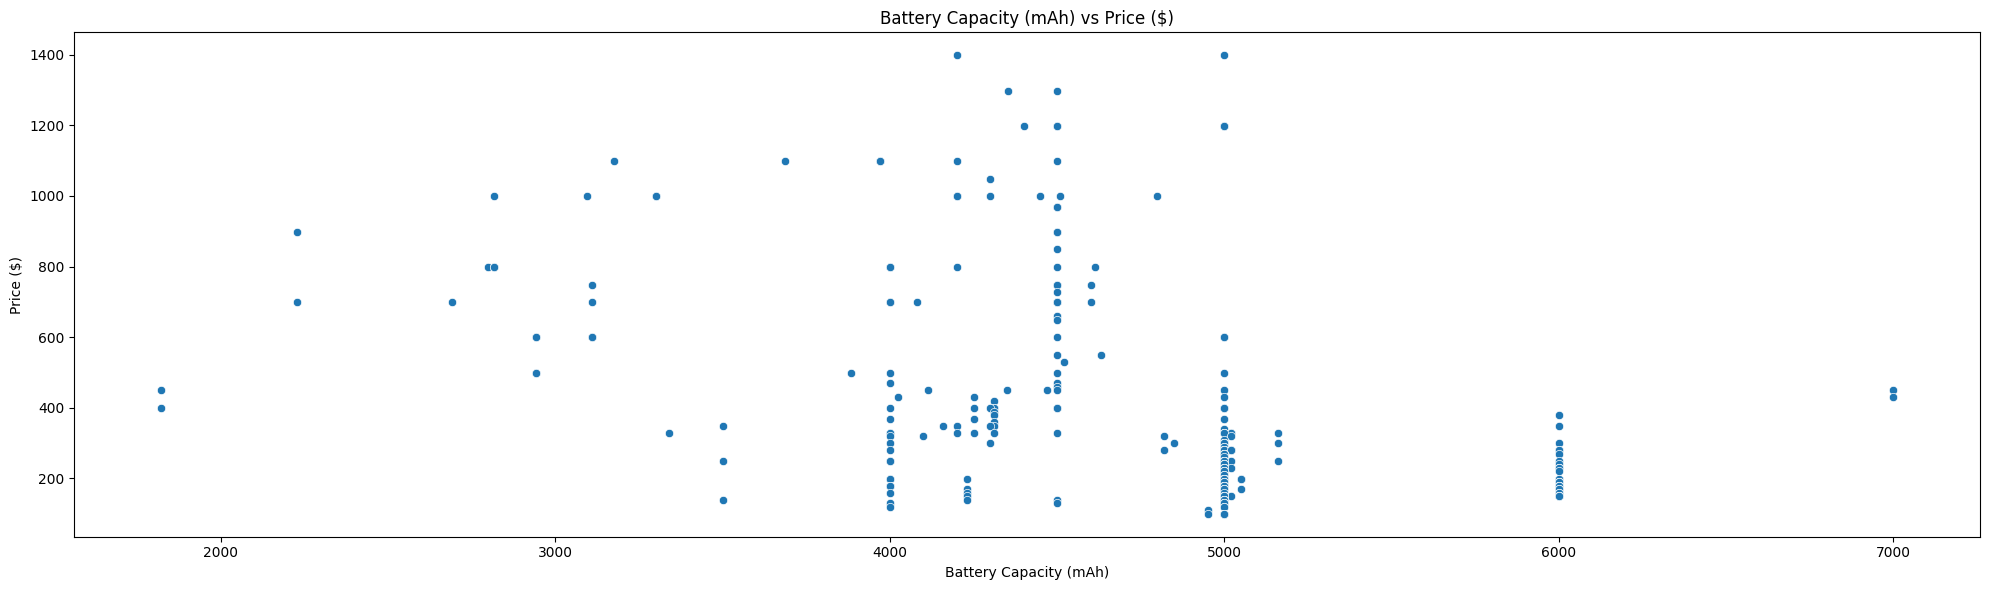

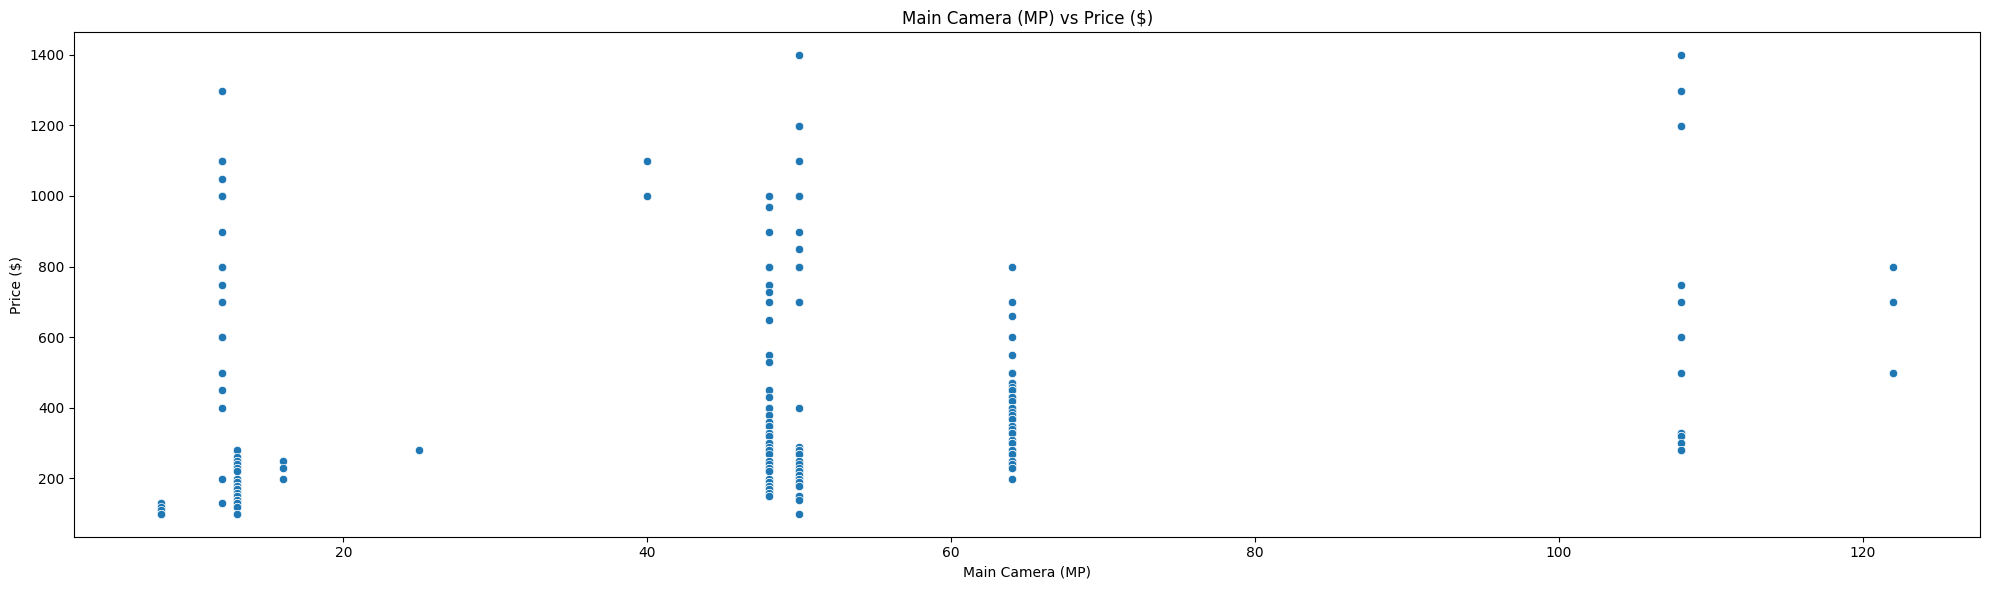

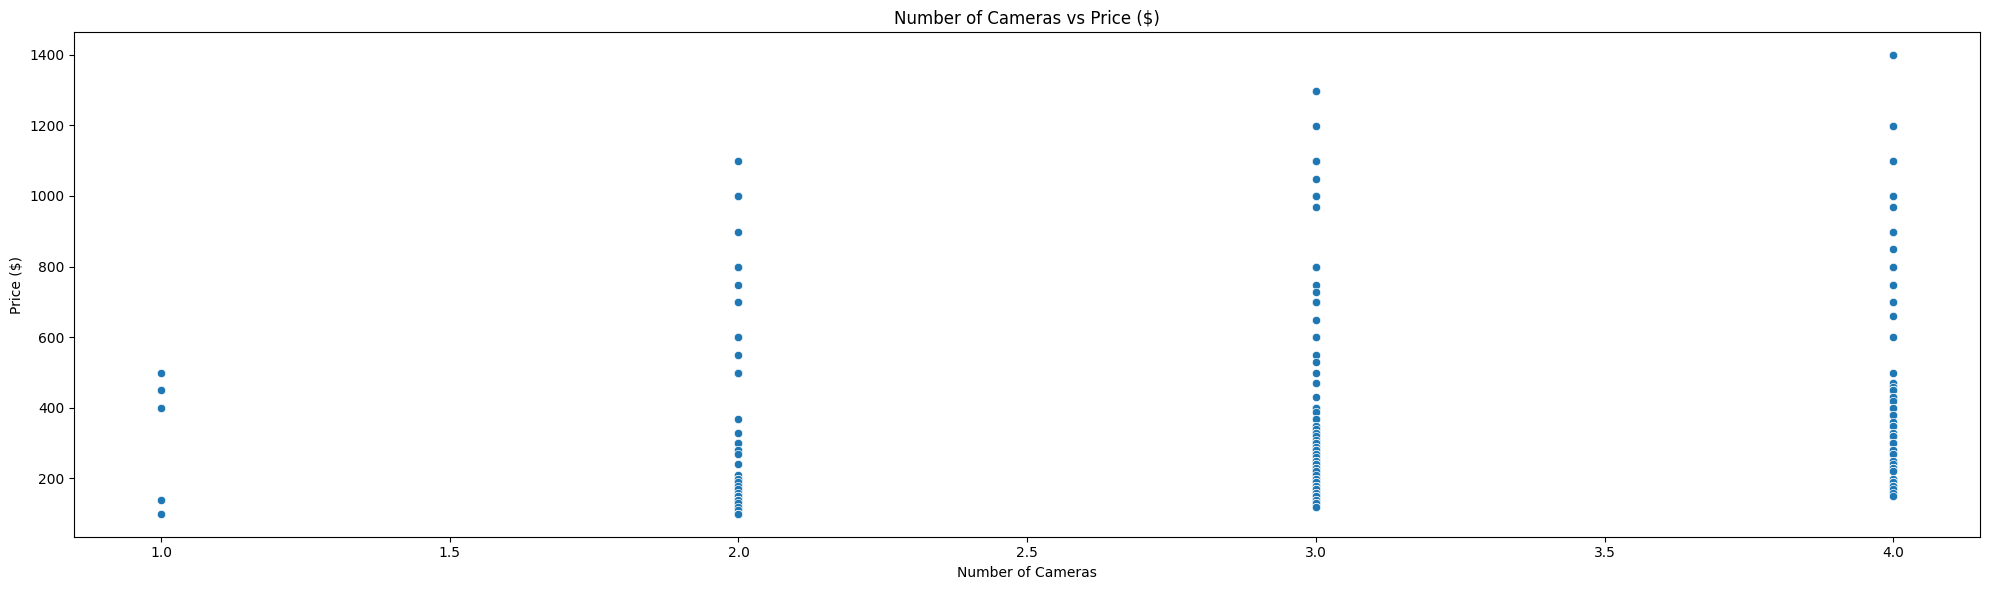

In [37]:
# For loop to plot a scatterplot to see the relationship between dataset varables and phone price

features = ['Brand','Storage', 'Screen Size (cm)', 'RAM', 'Battery Capacity (mAh)', 'Main Camera (MP)', 'Number of Cameras']
for feature in features:
    plt.figure(figsize=(20, 6))
    sns.scatterplot(x=cleaned_data[feature], y=cleaned_data['Price ($)'])
    plt.title(f'{feature} vs Price ($)')
    plt.xlabel(feature)
    plt.ylabel('Price ($)')
    plt.tight_layout()
    plt.show()

**What can be seen:**
*   Most brands have phones with varying prices, the ones that do not tend to also not have as many data entries. Samsumg has the largest spread and also one of the most expensive phones.
*   It is clear to see that based on the dataset, the higher the phone storage, the higher the mean of the spread of prices for phones with that storage is.
*   Most phones are the same size (within 3cm of each other), with a spread of prices.
*   The higher the phone RAM space, the higher the mean of the spread of prices for phones with that RAM space is.
* There is a large spread in the battery capacity of the phones, vs the price.
* For most of the Main Camera sizes, there is a spread of the phone price, which indicates other factors contributing to the price of a phone.
* The phones with 1 camera have a lower mean price overall than those with more cameras, and the mean slightly increases from 2 or more cameras. However, there is also less data for phones with 1 camera.


From here, we then plotted a correlation heatmap, to better understand the relationships between the variables.




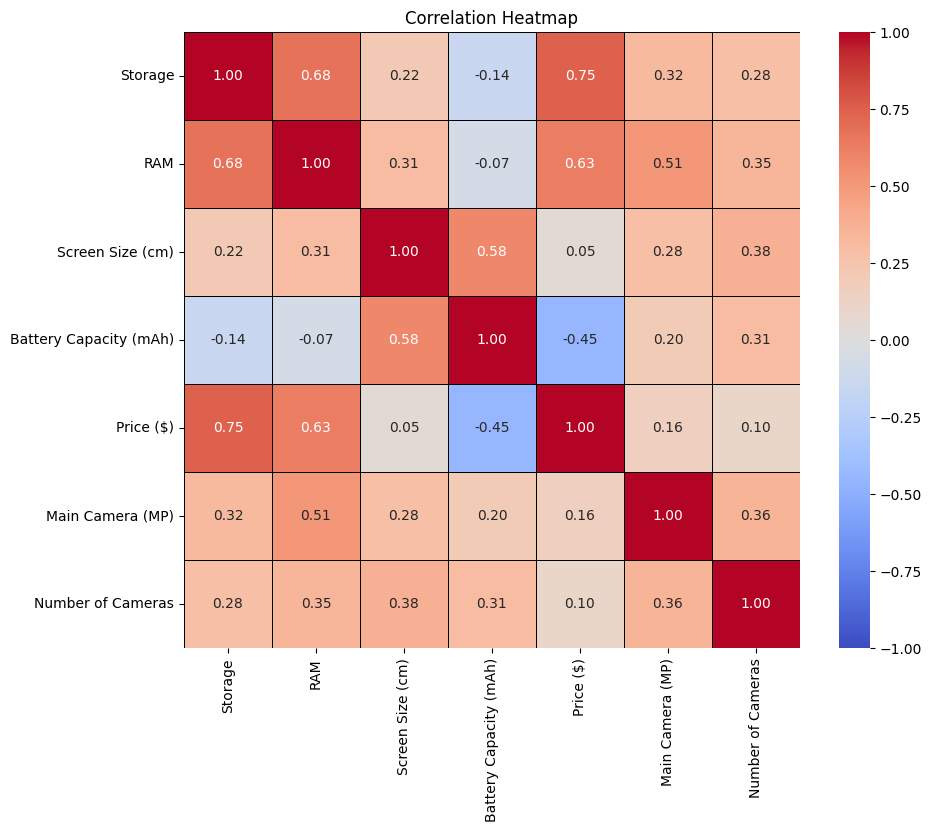

In [38]:
# Selecting only the variables with numeric data and defining this in a dataset for the correlation matrix

numerical_cols = ['Storage', 'RAM', 'Screen Size (cm)', 'Battery Capacity (mAh)', 'Price ($)', 'Main Camera (MP)', 'Number of Cameras']
numeric_df = cleaned_data[numerical_cols]

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0,
            linewidths=0.5, linecolor='black', square=True, fmt='.2f',
            annot_kws={'size': 10})

plt.title('Correlation Heatmap')
plt.show()

**Key takeaways from the correlation matrix:**
*   There are strong positive correlations between the phone price and the phone storage and RAM. Therefore, these will most likely be important contributors within the price predictor model. Models like linear regression and decision trees can be good in representing this relationship.
*   There is a moderate negative correlation between the phone price and the battery capacity. This is an interesting insight as it tells us that phones with higher battery capaity tends to be cheaper.
* There was a low/no correlation between the phone price and the remaining variables. These may have less predictive power individually but could still contribute in combination with the other variables. A non-linear model like decision trees or neural networks may be able to handle these variables well, capturing non-linear relationships that correlation alone might not reveal.
* There are some low to moderate positive correlations between the variables themselves [excluding comparison with price variable]. They may not influence each other, but can represent different aspects of the data.


---




Finally, we grouped the data by brand, and displayed their average prices. Due to the nature of heatmaps, brands could not be included in the heatmap above as they are categorical in nature and not numerical. As such, this graph was created to illustrate the effect brand has on price.

<ipython-input-39-059446e57793>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Brand', y='Price ($)', data=avg_price_by_brand, palette='colorblind')


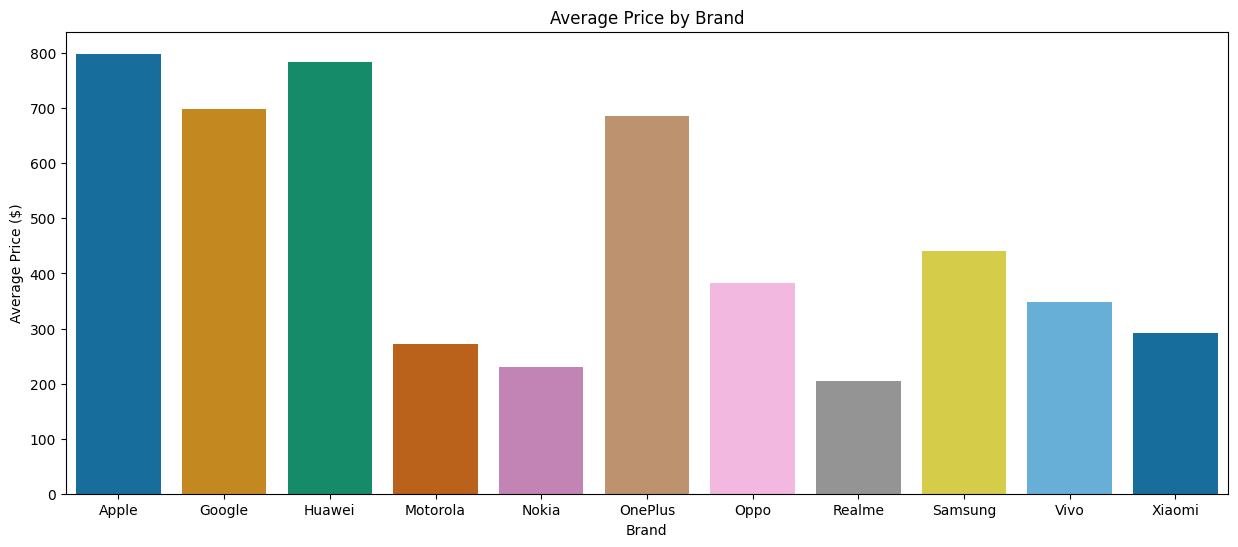

In [39]:
# Grouping the phone entries by brand and calculating their average prices

avg_price_by_brand = cleaned_data.groupby('Brand')['Price ($)'].mean().reset_index()


# Plotting grouped bar plot

plt.figure(figsize=(15, 6))
sns.barplot(x='Brand', y='Price ($)', data=avg_price_by_brand, palette='colorblind')
plt.title('Average Price by Brand')
plt.xlabel('Brand')
plt.ylabel('Average Price ($)')
plt.show()

As the graph above shows, different phone brands have different average prices. We summaise that this will be a major attribute when determining phone price of novel phones.

## **4.   Model Selection and Training**

Based on the analysis above, we narrowed our model selections to 2 models that we will train:

**1.   Decision Tree Model**

A decision tree model would be good for predicting phone prices given the dataset's diverse variables and potential non-linear relationships. It doesn't need a lot of preprocessing to deal with different types of data or outliers, which makes it perfect for studying how things like brand, storage, and other variables affect price. Also, it is able to understand which features are most important, and can use its tree-like strcuture of decsions to reach a suitable conclusion for input data.


**2.   Neural Network Model**

A neural network model would be good for finding complex patterns and connections among a lot of variables in the data. It can handle data with many dimensions and can discover subtle connections that decision trees might overlook and therefore pottentially make predictions more accurate. For instance, it can figure out how storage size, RAM, and price changes are linked across various brands.



---



To determine the best model for predicting phone prices, we will initially use both the decision tree and neural network models. The decision tree will provide insights into which variables matter the most, while the neural network will leverage the dataset's complexity to potentially achieve higher accuracy. By comparing their performance and considering the specific requirements of interpretability versus predictive power, we will select the model that best meets our goals for accurate and insightful price predictions.


---



---





Before the data can be fed into any machine learning model, it needs to be formatted in a manner that the ML model can use. In this case, the brand name is being encoded.

In [40]:
# Initialising an instance

label_encoder = LabelEncoder()

In [41]:
# Using the encoder instance to change the Brand names into numerical representations

encoded_brands = label_encoder.fit_transform(cleaned_data['Brand'])

print("Encoded brands (after label encoding):")
print(encoded_brands)

Encoded brands (after label encoding):
[ 2  8  8  0  8  2 10  6  8  9  0  0  2  0  2  0  0  8  8  9  2  8  8  0
  5  2  8  0  5  5  0  5  6  6  1  1  0  9  0  8  6  6  6  5  0 10  5  5
  0  3  6  0  1  5  6  1  2  0  8  2  6  8  0 10  8 10  0  0  0  4  6 10
  3  0  4  1  0  9  9  8  8  0  8  6  5  8  8  4 10  8  6  8  6  5  3  9
  6  6  7  8  7  0 10  6  6  6  8  9 10  7  6  8  6  4  7 10  2  9  9  5
 10  2  3 10 10  7 10 10 10  6  2  8  6 10 10  9  8  7  4  4  9 10  6  7
  3  3 10  5  6  8  7  9  9  8  9 10  8 10  8  8  9  8  7 10  3  7  6  8
 10 10  3  6  9  9  8  8  7  6  6  3  4  8  6  6  9  3 10  4  6  7  4 10
  9  3  7  8  6  8  9  7 10 10 10  9 10  6  3  3  8  8 10  6  7  8  6  8
 10  9  2  8  6 10  3  3  6 10  7  3  8  4  7  3  9  4  6  3  4 10 10 10
  7 10 10  8 10  8  6  7  9  8 10  4 10  7 10  6  9 10  8  8  8  6  7  9
 10  4  4  6  3  7  9  4 10  7  7  6  8  6 10  8  7  7  7  6 10  7  7  4
 10  4  9 10  6  3  8  4  4  8  6  7 10  9  7  8  7  7  4  7  8  7 10  4
  4  4  7  7

In [42]:
# Reshaping the encoded_brands to meet the input requirements of OneHotEncoder

encoded_brands = encoded_brands.reshape(-1, 1)

# Transforming the encoded numerical labels into one-hot encoded vectors

onehot_encoder = OneHotEncoder(sparse=False)
onehot_encoded = onehot_encoder.fit_transform(encoded_brands)

print("\nOne-hot encoded brands:")
print(onehot_encoded)


One-hot encoded brands:
[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [43]:
# Decoding to check that encoding has worked correctly

decoded_categories = label_encoder.inverse_transform(np.argmax(onehot_encoded, axis=1))

print("\nDecoded brands:")
print(decoded_categories)



Decoded brands:
['Huawei' 'Samsung' 'Samsung' 'Apple' 'Samsung' 'Huawei' 'Xiaomi' 'Oppo'
 'Samsung' 'Vivo' 'Apple' 'Apple' 'Huawei' 'Apple' 'Huawei' 'Apple'
 'Apple' 'Samsung' 'Samsung' 'Vivo' 'Huawei' 'Samsung' 'Samsung' 'Apple'
 'OnePlus' 'Huawei' 'Samsung' 'Apple' 'OnePlus' 'OnePlus' 'Apple'
 'OnePlus' 'Oppo' 'Oppo' 'Google' 'Google' 'Apple' 'Vivo' 'Apple'
 'Samsung' 'Oppo' 'Oppo' 'Oppo' 'OnePlus' 'Apple' 'Xiaomi' 'OnePlus'
 'OnePlus' 'Apple' 'Motorola' 'Oppo' 'Apple' 'Google' 'OnePlus' 'Oppo'
 'Google' 'Huawei' 'Apple' 'Samsung' 'Huawei' 'Oppo' 'Samsung' 'Apple'
 'Xiaomi' 'Samsung' 'Xiaomi' 'Apple' 'Apple' 'Apple' 'Nokia' 'Oppo'
 'Xiaomi' 'Motorola' 'Apple' 'Nokia' 'Google' 'Apple' 'Vivo' 'Vivo'
 'Samsung' 'Samsung' 'Apple' 'Samsung' 'Oppo' 'OnePlus' 'Samsung'
 'Samsung' 'Nokia' 'Xiaomi' 'Samsung' 'Oppo' 'Samsung' 'Oppo' 'OnePlus'
 'Motorola' 'Vivo' 'Oppo' 'Oppo' 'Realme' 'Samsung' 'Realme' 'Apple'
 'Xiaomi' 'Oppo' 'Oppo' 'Oppo' 'Samsung' 'Vivo' 'Xiaomi' 'Realme' 'Oppo'
 'Samsung'

In [44]:
# Above shows that the encoding process was successfull
# A column is added for the encoded brand values
cleaned_data['Brand_Encoded'] = label_encoder.fit_transform(cleaned_data['Brand'])

Now that the brand names have been encoded, we can start the ML model building process, starting first with Decision Tree Regression Model.

### **Decision Tree Regression**

 We first start any ML model by splitting our data into training, validation and testing data

#### **Splitting the data: Train, Validation, Test Sets**

First we define the features of our model (using our dataset varaibles) and the target (in this case, price as that is what we would like to predict).

In [45]:
# The features and target are defined

X = cleaned_data[['Brand_Encoded', 'Storage', 'RAM', 'Screen Size (cm)', 'Battery Capacity (mAh)', 'Main Camera (MP)', 'Number of Cameras']]  # features (input)
y = cleaned_data['Price ($)']  # target

We can then split the data into training, validation and testing data using scikit learn's 'train_test_split' random sampling funtion. As train_test_split splits data into only 2 (usually for training and test), we first split the data into 2 to extract the training set, then we split the remaining data into 2 again to get the validation and testing sets.

We have used a **70:15:15** split, ensuring that the training set is the largest set.

* Below in the code, 'test_size=0.3' means that the training set will be 70% of the data and the rest (30%) is ued as the test set. But of course, due to the above, this 30% will be further split in half for validation and testing sets.

* We have set our random_state=42, to ensure that the same split is used every time the code is executed.

Below we have also included checks to ensure the amount of data for each set is consistent with our split plan, and that the Brand encoding was used in the data split.

In [46]:
# The data is split into training, validation and testing data

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [47]:
# Checking the size of the training, validation and testing data

print("Training set size:", X_train.shape[0])
print("Validation set size:", X_val.shape[0])
print("Test set size:", X_test.shape[0])


Training set size: 224
Validation set size: 48
Test set size: 48


We can now start to build our model.

---



#### **Building the model**

From the sklearn library we can simply call and use the DecisionTreeRegressor model. It is a very basic model which we will hyperparameter tune later. For now, we wish to compare how a simple Decision Tree Regression will compare to a simple Feedforward neural network. We have named our model 'model'.

In [48]:
# Creation of model

model = DecisionTreeRegressor()

We then fit the model to the training data that we extracted previously. At this stage we are still creating the model.

In [49]:
# Model is trained on training data

model.fit(X_train, y_train)

DecisionTreeRegressor()

We can then use the model to give predicted (target) price values from the validation data, using the validation input data. At this stage we are seeing if our model works.

In [50]:
# Predict applied - uses the model to predict the price based of validation data

y_pred_val = model.predict(X_val)

Now we evaluate the accuracy of our model (the difference between predicted and actual values) using error-based statistics:
* **Mean Squared Error (MSE)** -  Measures the average of the squared differences between predicted and actual values.
* **Mean Absolute Error (MAE)** - Measures the average absolute difference between predicted and actual values
* **R-Squared** - Measures the proportion of the variance in the input variable that can be predicted from the output variables.

In [51]:
# Evaluating the model on validation data

mse_val = mean_squared_error(y_val, y_pred_val)
mae_val = mean_absolute_error(y_val, y_pred_val)
r2_val = r2_score(y_val, y_pred_val)


In [52]:
# Printing the above calculated values

print(f"Mean Squared Error on Validation Set: {mse_val:.4f}")
print(f"Mean Absolute Error on Validation Set: {mae_val:.4f}")
print(f"R-squared on Validation Set: {r2_val:.4f}")

Mean Squared Error on Validation Set: 11487.5000
Mean Absolute Error on Validation Set: 61.8056
R-squared on Validation Set: 0.8716


The high Mean Squared Error (MSE) and Mean Absolute Error (MAE) suggest that our model needs improvement. The significant variance in prices likely contributes to these high error rates. However, the R-squared value is quite good, and an average of 62 dollars in variance between the predicted and average value is acceptable. Therefore, we decided to investigate this model further. We will later apply hyperparameter tuning to see if we can enhance its performance.

We can now use the test set to see the performance of our model.

In [53]:
# Predict utilised - using model on test data to predict price

y_pred_test = model.predict(X_test)

Now we evaluate the accuracy of our model again. If the the error on the test set is higher than the error on the validation set, it means we have overfitted.

In [54]:
# Evaluating the model on test data
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f"\nMean Squared Error on Test Set: {mse_test:.4f}")
print(f"Mean Absolute Error on Test Set: {mae_test:.4f}")
print(f"R-squared on Test Set: {r2_test:.4f}")


Mean Squared Error on Test Set: 18951.0417
Mean Absolute Error on Test Set: 85.2083
R-squared on Test Set: 0.7839


The R-Squared value on both sets are high, however the error on the test set is higher than the error on the validation set, indicating that overfitting has taken place. Later on in the evaluation section of our project we will improve this by using hyperperameter tuning as well as a check with real world data to.

#### **Visualising our sets against the actual values**

We can now use line and scatter plots to visually determine how well our validation and test set worked against the actual values.

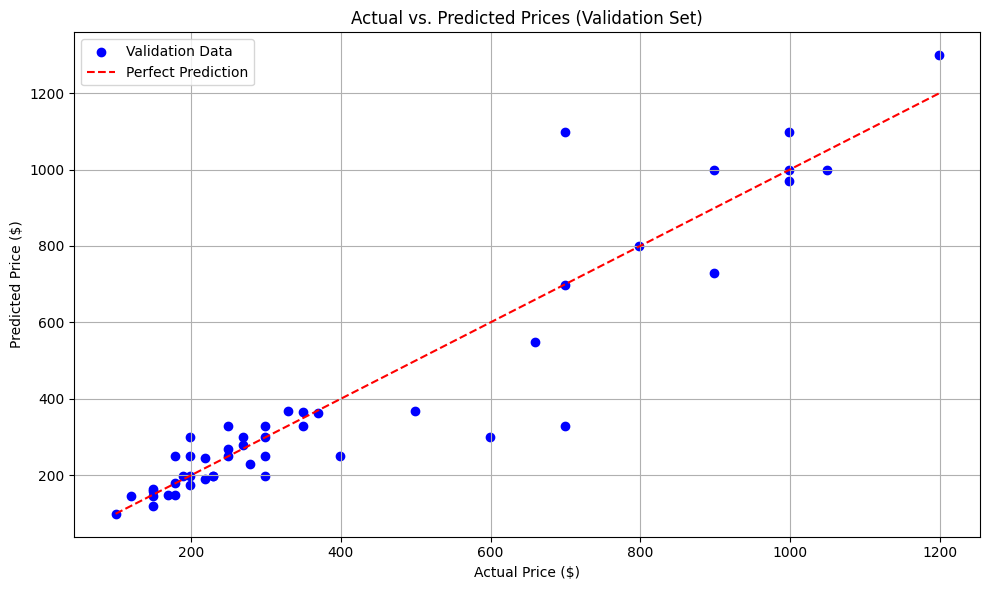

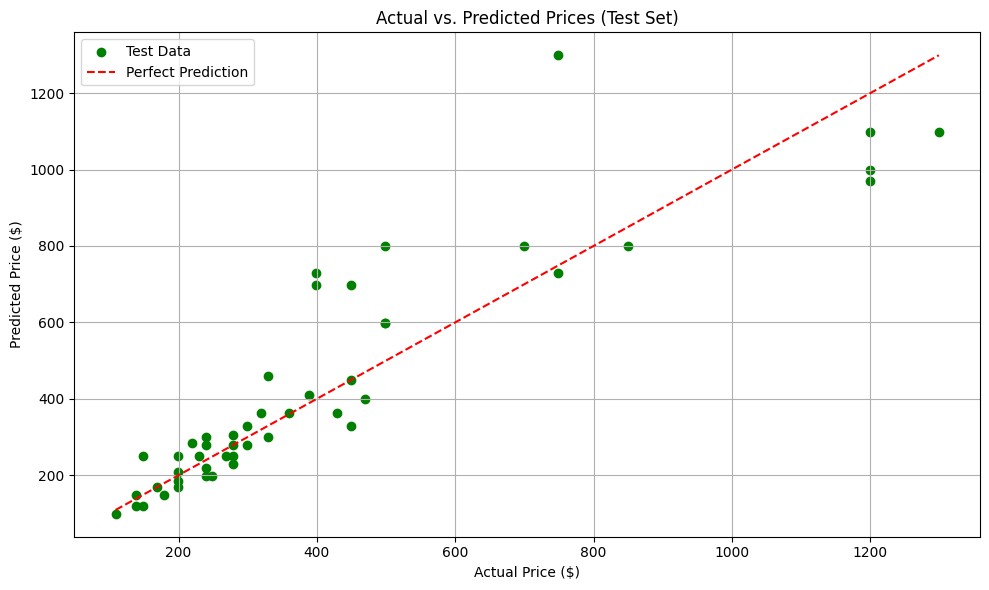

In [55]:
# Plotting Validation Set

plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred_val, color='blue', label='Validation Data')  # Validation Set
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], '--', color='red', label='Perfect Prediction')  # A perfect prediction (where the predicted values are equal to the actual values)
plt.title('Actual vs. Predicted Prices (Validation Set)')
plt.xlabel('Actual Price ($)')
plt.ylabel('Predicted Price ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Plotting Test Set

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, color='green', label='Test Data')  # Test Set
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', label='Perfect Prediction')  # A perfect prediction (where the predicted valuse are equal to the actual values)
plt.title('Actual vs. Predicted Prices (Test Set)')
plt.xlabel('Actual Price ($)')
plt.ylabel('Predicted Price ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

The red line is the perfect prediction line. These two graphs help visually evaluate the model. Visually, both of these graphs indicate that model has performed mostly well, however the model seems to struggle with higher priced phones. This may be due to the distribution of our dataset, as there is less data of phones with higher prices.

We now move on to the next model, the Neural Network model.

### **(Feed Forward) Neural Network**

#### **Splitting the data: Train, Validation, Test Sets**

Splitting the data uses the same process as for the Decision Tree Model.

In [56]:
# The features and target are defined

X = cleaned_data[['Brand_Encoded', 'Storage', 'RAM', 'Screen Size (cm)', 'Battery Capacity (mAh)', 'Main Camera (MP)', 'Number of Cameras']]  # features (input)
y = cleaned_data['Price ($)']  # target


In [57]:
# The data is split into training, validation and testing data

X_train_nn, X_temp_nn, y_train_nn, y_temp_nn = train_test_split(X, y, test_size=0.3, random_state=42)
X_val_nn, X_test_nn, y_val_nn, y_test_nn = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

#### **Building the model**

##### **Preprocessing**

From the sklearn library we can simply call and use StandardScaler to perform data scaling, which is done before training a neural network. Please see the comments within the code for steps on how this is done. This makes sure that all data is scaled consistently, which is done to avoid data leakage and to ensure that the model is evaluated on data that is scaled in the same way as the training data.

In [58]:
# Introducing a scalar that will be used to standardise the features
scaler = StandardScaler()

# Fitting the scaler to the training data and transforming it into the standardized training data.
X_train_scaled = scaler.fit_transform(X_train_nn)

# Same transformation but without re-fitting is applied to the validation and test data, resulting in standardized validation and test data.
X_val_scaled = scaler.transform(X_val_nn)
X_test_scaled = scaler.transform(X_test_nn)

###### **Class with 2 Functions used to track R-Squared value**

The Callback class from the High level API, Keras, is used to first create an **init** function that will store the R-squared value of the predicted values generated from the validation data at each epoch (each iteration) of the ML model.

The **on_epoch_end** function will calculate the R-squared score for the validation set after every epoch and store this result.

These 2 functions within this callback class allows for the monitoring of the performance of the model during training.



In [59]:
# Class created so that r2 value can be tracked.
# Custom R2Callback class created from Keras Callback class
class R2Callback(Callback):
    def __init__(self, validation_data):
        super(R2Callback, self).__init__()
        self.validation_data = validation_data
        self.r2_scores = []
# Validation_data takes in X_val_nn, y_val_nn
# The class than calls in the initialiser of Callback class.
# self.validation_data stores the validation data, and self.r2_scores initialises a list to store R-squared scores.

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        X_val_nn, y_val_nn = self.validation_data
        y_val_pred_nn = self.model.predict(X_val_nn)
        val_r2_nn = r2_score(y_val_nn, y_val_pred_nn)
        self.r2_scores.append(val_r2_nn)
        print(f" - val_r2: {val_r2_nn:.4f}")
        logs['val_r2'] = val_r2_nn
# The on_epoch_end method in the class calculates the R-squared score for the validation set after every epoch.
# It retrieves the validation data, predicts outputs using the model, calculates the R-squared score.
# The method then stores it in self.r2_scores, prints it, and logs it for further analysis.

##### **Neural Network Model**

Below we finally define the nerual network model with 3 layers via the Keras Sequential model. Function activation='relu' is used for identifying non-linear patterns. There is an input layer, a hidden layer and finally the output layer, with the 'Dense(x)' showing us how many neurons there are in the layer. Naturally, our traiing data is placed in the first, input layer.

In [60]:
# Defining the neural network with 3 layers

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_nn.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer (single neuron for regression)
])

We then use the optimizer Adam to speed up training and counteract any biases. Note that 'loss='mean_squared_error'' is used to define the performance of the model during training.

In [61]:
# Defining the optimizer using Adam and applyng it to our model

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

We can now use all that we have defined before to run our model.

We will first use the callback function on our validation data, then we will fit the model using the scaled training data as the input, and we will run this for 50 epochs. It will also assess the performance on the validation set, as well as log the R-Squared value for each epoch.

In [62]:
# Defining a callback using the callback class from earlier against our validation data
r2_callback = R2Callback(validation_data=(X_val_scaled, y_val_nn))

# Fitting the data to the model
history = model.fit(X_train_scaled, y_train_nn, epochs=50, batch_size=8,
                    validation_data=(X_val_scaled, y_val_nn), callbacks=[r2_callback], verbose=1)

Epoch 1/50
2/2 [==============================] - 0s 7ms/step
 - val_r2: -1.8495
28/28 [==============================] - 3s 38ms/step - loss: 235141.1250 - val_loss: 254943.6406 - val_r2: -1.8495
Epoch 2/50
2/2 [==============================] - 0s 8ms/step
 - val_r2: -1.8211
28/28 [==============================] - 0s 16ms/step - loss: 233289.7969 - val_loss: 252405.8125 - val_r2: -1.8211
Epoch 3/50
2/2 [==============================] - 0s 5ms/step
 - val_r2: -1.7723
28/28 [==============================] - 1s 20ms/step - loss: 229926.5781 - val_loss: 248043.2344 - val_r2: -1.7723
Epoch 4/50
2/2 [==============================] - 0s 12ms/step
 - val_r2: -1.6877
28/28 [==============================] - 0s 18ms/step - loss: 224151.3594 - val_loss: 240469.0469 - val_r2: -1.6877
Epoch 5/50
2/2 [==============================] - 0s 10ms/step
 - val_r2: -1.5463
28/28 [==============================] - 1s 31ms/step - loss: 214650.0000 - val_loss: 227817.4844 - val_r2: -1.5463
Epoch 6/50
2/

We can now assess the performance of the model using the test data.

It then calculates the R-squared score, which measures how well the predicted values match the actual target values.

In [63]:
# Predict utilised - using model on test data to predict price
y_pred_nn = model.predict(X_test_scaled)

# Calculating the R-Squared value, comparing the test data to the actual data
test_r2_nn = r2_score(y_test_nn, y_pred_nn)
print(f"\nR-squared on Test Set: {test_r2_nn:.4f}")

2/2 [==============================] - 0s 5ms/step

R-squared on Test Set: 0.7586


Even though the R-Squared value is high (within the top quarter closest to 1), one can see that the R-Squared value is lower than that for the decision tree model.

#### **Visualising our sets**

We can now use line and scatter plots to visually determine how well our validation and test set worked against the actual values.

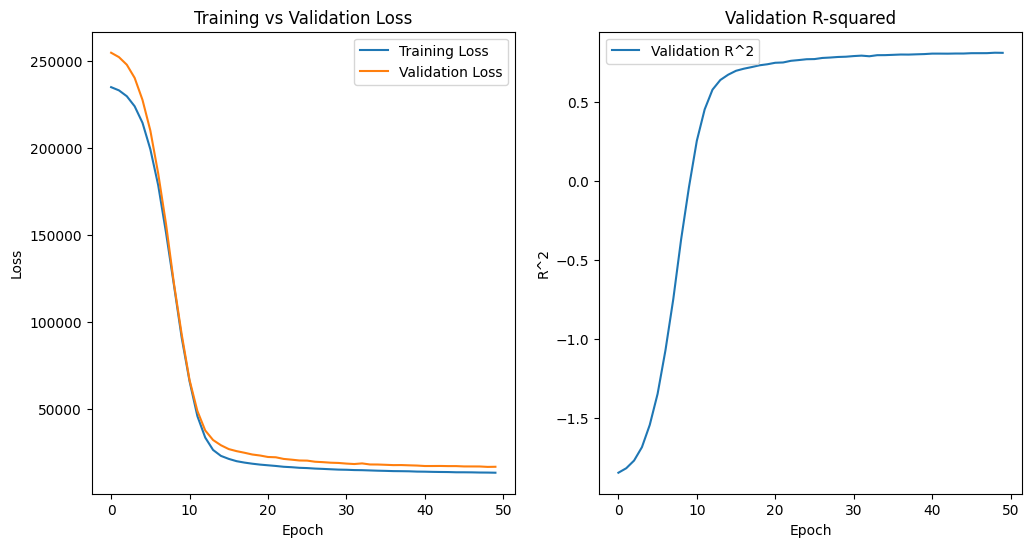

In [64]:
plt.figure(figsize=(12, 6))

# Plotting Loss

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


# Plotting R-squared

plt.subplot(1, 2, 2)
plt.plot(r2_callback.r2_scores, label='Validation R^2')
plt.title('Validation R-squared')
plt.xlabel('Epoch')
plt.ylabel('R^2')
plt.legend()

The first graph is showing us that the loss for both the validation and training set decreased over each epoch run, whihc indicates a good learning from the model.

The plateau for the validation set being slighty higher than that for the training set indicates either slight variation in the data, or slight overfitting. However, the difference between training and validation is very small, and it can be expected that the validation to be slightly higher due to performing better after the model ran on the training set.

The second graph shows that after around 40 epocs, R-Squared value stayed constant, showing that we selected an appropriate number of epochs to reach the stopping point of where the model has learned.

### **Conclusion on the Decision Tree Model vs Neural Network Model**

Both models ran successfully, with each yielding R-Squared values within the top quarter. However, we decided to proceed with the Decision Tree Model for further evaluation and hyperparameter fine tuning, due to the following reasons:

* **Complexity.** The complexity and run time of Neural Network is higher than that of the Decision Tree Model.
* **Runtime.** A Neural Network works better with more data, but this also means an even longer runtime. Due to project time contraints, it is the better choice to proceed with the Decision Tree Model.
* **R-Squared value.** The test R-Squared value for the Decision Tree Model was higher than that of the Neural Network model. Therefore because of this and the other reasons above, we deemed that it would be more fruitfull and efficient for time to focus on evaluating an improving the Decision Tree Model.

## **5.    Model Evaluation and Improvement**

#### **Hyperparameter Tuning the Decision Tree Model with GridSearchCV**

GridSearchCV is a powerful hyperparameter tuning tool, which systematically works through multiple combinations of parameter tunes, cross-validating as it goes to determine which tune gives the best performance.

Reasons for choosing this method;
- **Systematic Search:** GridSearchCV systematically evaluates all combinations of hyperparameters to find the optimal set for the best model performance.
- **Cross-Validation:** It ensures robust hyperparameter tuning by averaging performance metrics over several train-test splits.
- **Automation:** GridSearchCV automates hyperparameter tuning, saving significant time and effort.
- **Evaluation Metrics:** It allows specifying different scoring metrics to focus on the most important performance criteria.
- **Parallel Processing:** GridSearchCV can utilise multiple CPU cores, significantly speeding up the search process.
- **Comprehensive Analysis:** It ensures no potential good sets of hyperparameters are missed by evaluating all possible combinations.

Below we use GridSearchCV for the hyperparameter tuning of our Decision Tree Model.

In [65]:
# Define a pipeline

pipeline = Pipeline([
    ('regressor', DecisionTreeRegressor(random_state=42))
])

As we used K-fold cross-validation, the parameters needed to as simplied as possible. For example, the criterion criteria was reduced to 'squared_error' and 'friedman_mse' as these were the two outcomes after every GridSearch. We wanted to give the GridSearch varity in the grid while being conscious of the timeframe to complete this project.

In [66]:
# Define the parameter grid

param_grid = {
    'regressor__criterion': ['squared_error', 'friedman_mse'],
    'regressor__splitter': ['best', 'random'],
    'regressor__max_depth': [10, 20, 30, None],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 5],
    'regressor__max_features': [None, 'auto', 'sqrt'],
    'regressor__min_impurity_decrease': [0.0, 0.01, 0.1]
}

K-fold cross-validation was used it provided the best parameters for the model. The procedures involves repeating the cross-validation procedure multiple times and reporting the mean result across all folds from all runs. As such, the results are expected to be a more accurate estimate of the true unknown underlying mean performance of the model on the dataset, as calculated using the standard error. Multiple techniques were trialed, however this configuration worked best for our model.

In [67]:
# Use RepeatedKFold for cross-validation

cv = RepeatedKFold(n_splits=7, n_repeats=2, random_state=42)

We can now initialise a grid search using the above parameter tunes.

In [68]:
# Initialising the grid search using the defined factors in the above cells

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=cv, # use RepeatedKFold cross validation
    verbose=2,
    n_jobs=-1 #Use all CPU
)

In [69]:
# Implement GridSearchCV

grid_search.fit(X_train, y_train)

Fitting 14 folds for each of 1296 candidates, totalling 18144 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


GridSearchCV(cv=RepeatedKFold(n_repeats=2, n_splits=7, random_state=42),
             estimator=Pipeline(steps=[('regressor',
                                        DecisionTreeRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'regressor__criterion': ['squared_error',
                                                  'friedman_mse'],
                         'regressor__max_depth': [10, 20, 30, None],
                         'regressor__max_features': [None, 'auto', 'sqrt'],
                         'regressor__min_impurity_decrease': [0.0, 0.01, 0.1],
                         'regressor__min_samples_leaf': [1, 2, 5],
                         'regressor__min_samples_split': [2, 5, 10],
                         'regressor__splitter': ['best', 'random']},
             verbose=2)

We can now print the best parameters found:

In [70]:
# Print the best parameters

print("Best parameters found:", grid_search.best_params_)

Best parameters found: {'regressor__criterion': 'friedman_mse', 'regressor__max_depth': 20, 'regressor__max_features': None, 'regressor__min_impurity_decrease': 0.0, 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 2, 'regressor__splitter': 'random'}


And then train the model with these parameters:

In [71]:
# Train the model with the best parameters

best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

Pipeline(steps=[('regressor',
                 DecisionTreeRegressor(criterion='friedman_mse', max_depth=20,
                                       random_state=42, splitter='random'))])

Finally, we can evaluate the accuracy of our model.

In [72]:
# Evaluate the tuned model test set

best_model_y_pred_test = best_model.predict(X_test)
best_model_test_r2 = r2_score(y_test, best_model_y_pred_test)
print(f"\nR-squared on Test Set: {best_model_test_r2:.4f}")


R-squared on Test Set: 0.8729


In [73]:
# Evaluate the tuned model vaidation set

best_model_y_pred_val = best_model.predict(X_val)
best_model_val_r2 = r2_score(y_val, best_model_y_pred_val)
print(f"\nR-squared on Validation Set: {best_model_val_r2:.4f}")


R-squared on Validation Set: 0.8295


#### **Visualising the feature importance**

We can also visualise the fetaure importance, showing which features have the most influence on the model.

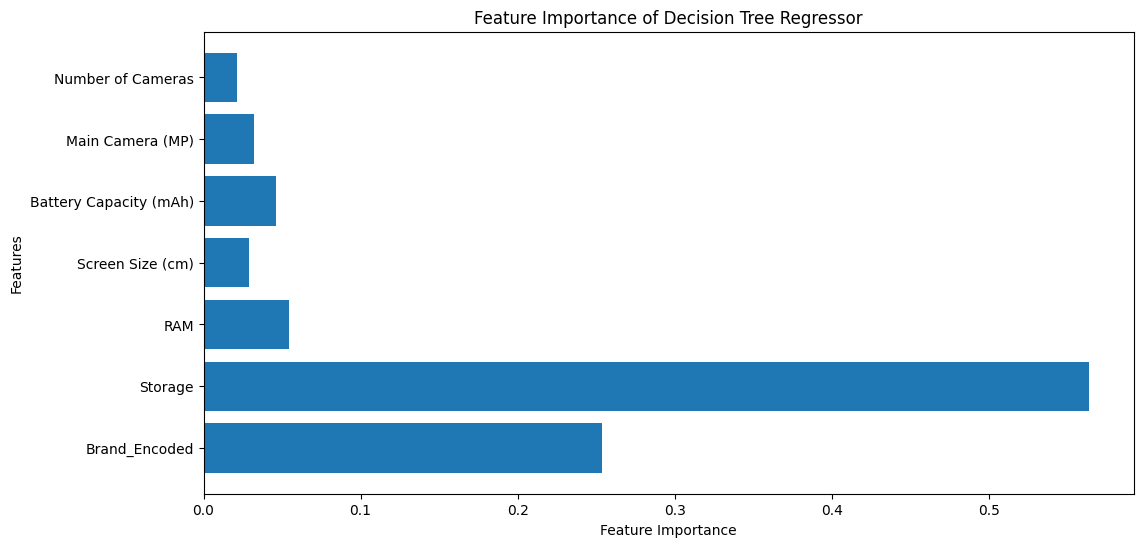

In [74]:
# Plotting feature importance

feature_importance = best_model.named_steps['regressor'].feature_importances_
features = X.columns


# Plotting on a bar chart

plt.figure(figsize=(12, 6))
plt.barh(features, feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance of Decision Tree Regressor')
plt.show()

We can see that Storage and Brand had the highest feture importance, significantly greater than th other phone features. This is an interesting but not surprising result, as our previous correlation matrix showed a positive correlation betweem storage and phone price.

The brand could not be included in the correlation matrix due to it being categorical in nature, so it is interesting to see this graph reveal how important it was to determining the phone price, as indicated by the variance in the average phone price by brand graph displayed earlier.

#### **Comparison of Original Test Set vs Tuned Test Set**

We can finally compare the R-squared scores of the original and tuned models.

In [75]:
# Compare R-squared scores of the original and tuned models

original_r2 = r2_test  # R-squared score of the original model
tuned_r2 = best_model_test_r2  # R-squared score of the tuned model

print(f"Original Model R-squared: {original_r2:.4f}")
print(f"Tuned Model R-squared: {tuned_r2:.4f}")

Original Model R-squared: 0.7839
Tuned Model R-squared: 0.8729


As one can see, the R-Squared value of the tuned model test set is higher than that of the original model test set. This shows that we have successfully used hyperparameter finetuning to improve our Decsion Tree Model.

Below we will do a test on real data of a phone to further test our tuned model.

### **Test on a phone**
We now do a test on real data of a phone to further evaluate our tuned model. The test is on an iPhone 15 with 128GB of Storage. This phone was not in our dataset, so it will be a true test based purely on it's features. The price stated on the Apple website for this phone is 799 dollars.

In [76]:
# iPhone 15 feature information
random_phone = {
    'Brand_Encoded': [0],  # we use encoded brands in our cleanded dataset, and Apple is represented by a 0
    'Storage': [128],
    'RAM': [6],
    'Screen Size (cm)': [15.5448],
    'Battery Capacity (mAh)': [3349],
    'Main Camera (MP)': [48],
    'Number of Cameras': [2]
}

# Convert the new phone data to a DataFrame
random_phone_df = pd.DataFrame(random_phone)

# Predict the price of the new phone
predicted_price = best_model.predict(random_phone_df)

print(f"The predicted price of the phone is: {predicted_price[0]} dollars.")
print(f"The real price of the phone is: 799 dollars.")

The predicted price of the phone is: 799.0 dollars.
The real price of the phone is: 799 dollars.


Our model predicted the phone price to be 799 dollars. This is the same as the phone's actual price of 799 dollars, showing our model to be successful in predicting the price of a phone based on its features, even when testing it on real world data.

## **6.   Results & Conclusion**

To show our results of building a model and then evaluating and improving it, we have visually displayed the comparison of the R-Squared values for the original test set and the tuned test set below.





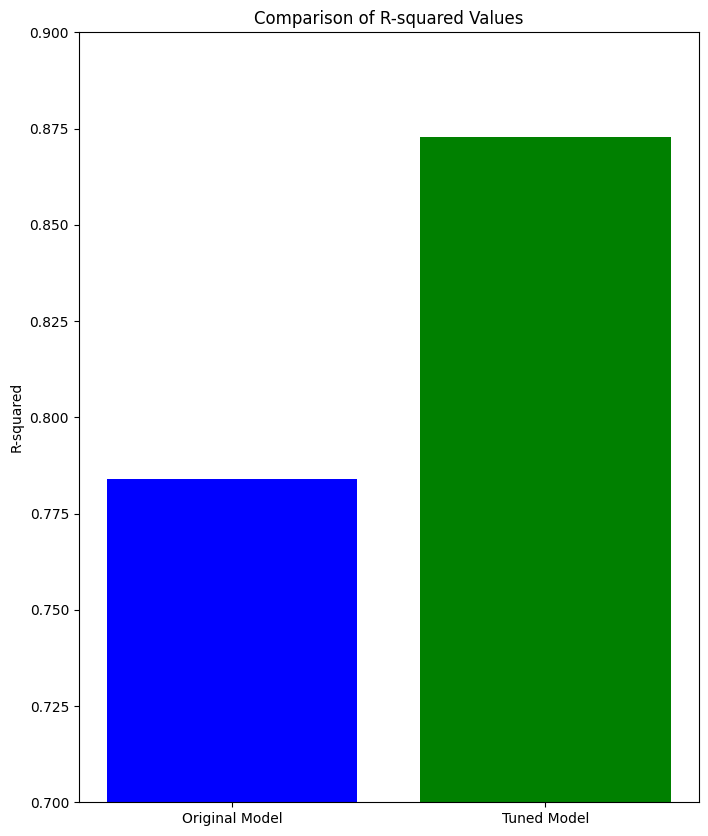

In [77]:
# Visualise R-squared Comparison

plt.figure(figsize=(8, 10))
plt.bar(['Original Model', 'Tuned Model'], [original_r2, tuned_r2], color=['blue', 'green'])
plt.ylim(0.7, 0.90)
plt.ylabel('R-squared')
plt.title('Comparison of R-squared Values')
plt.show()

The tuned model shows a significant improvement in R-squared value compared to the original model. This indicates that the tuned model explains a higher proportion of the variance in the target variable. Hyperparameter tuning has optimised the decision tree, resulting in better generalization and more accurate predictions.

We can also plot this on line and scatter plots, as done previously, to visually determine how well our validation and test set for the original and tuned model worked against the actual values.

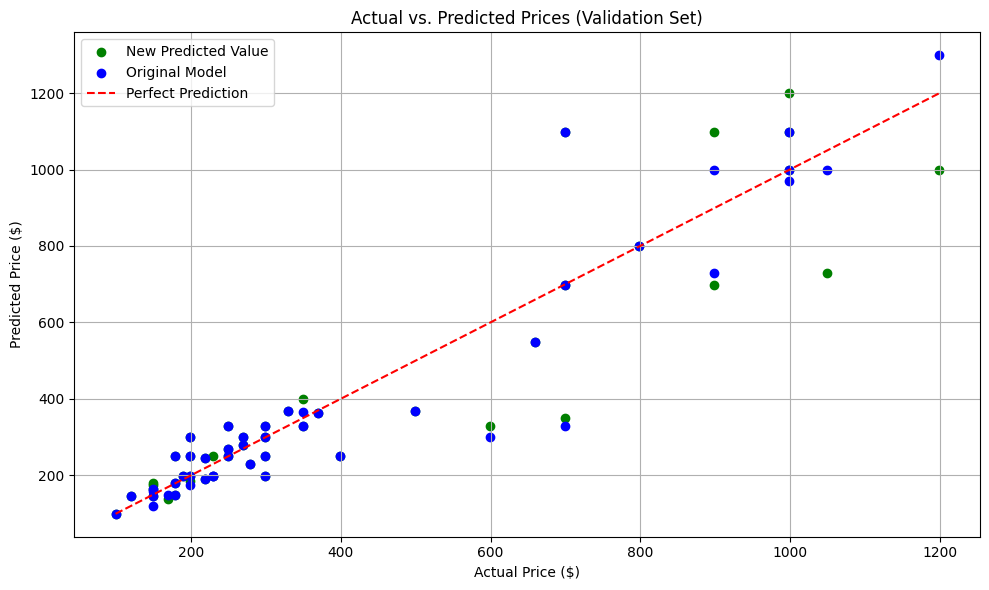

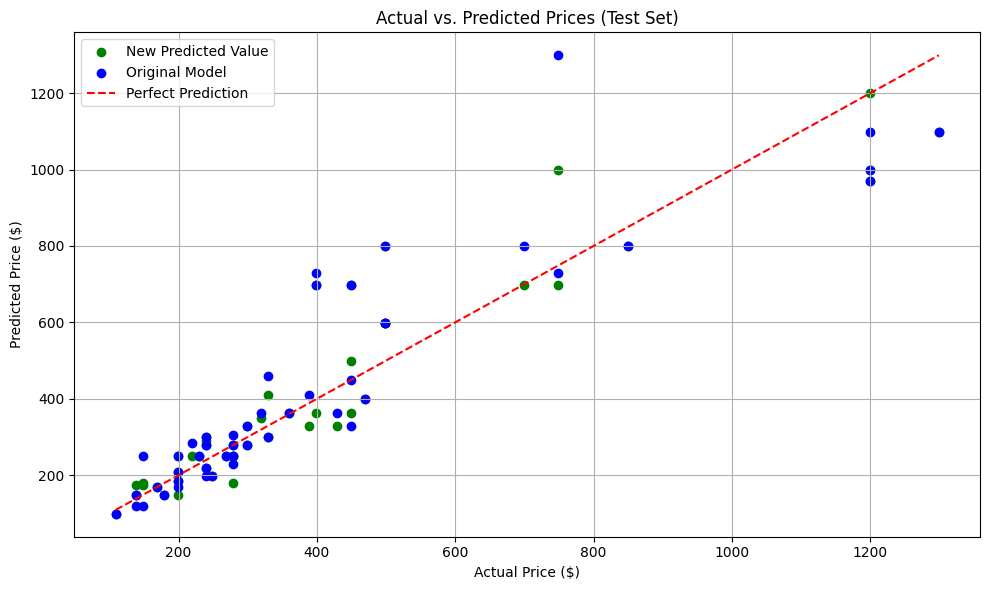

In [80]:
# Plotting Validation Set

plt.figure(figsize=(10, 6))
plt.scatter(y_val, best_model_y_pred_val, color='green', label='New Predicted Value')
plt.scatter(y_val, y_pred_val, color='blue', label='Original Model')  # Adding the new point
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], '--', color='red', label='Perfect Prediction')
plt.title('Actual vs. Predicted Prices (Validation Set)')
plt.xlabel('Actual Price ($)')
plt.ylabel('Predicted Price ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Plotting Test Set

plt.figure(figsize=(10, 6))
plt.scatter(y_test, best_model_y_pred_test, color='green', label='New Predicted Value')
plt.scatter(y_test, y_pred_test, color='blue', label='Original Model')  # Adding the new point
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', label='Perfect Prediction')
plt.title('Actual vs. Predicted Prices (Test Set)')
plt.xlabel('Actual Price ($)')
plt.ylabel('Predicted Price ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


It can be seen that the tuned test set performed better than the original test set, specifically seen by the reduction in large variation from the perfect-fit line especially for the higher prices.

We can no finally display all the error values for both the original and the tuned Decision Tree Model:

In [79]:
# Evaluating the improved model on test data

best_model_mse_test = mean_squared_error(y_test, best_model_y_pred_test)
best_model_mae_test = mean_absolute_error(y_test, best_model_y_pred_test)
best_model_r2_test = r2_score(y_test, best_model_y_pred_test)

print(f"Improved Model Mean Squared Error on Test Set: {best_model_mse_test:.4f}")
print(f"Improved Model Mean Absolute Error on Test Set: {best_model_mae_test:.4f}")
print(f"Improved Model R-squared on Test Set: {best_model_r2_test:.4f}")


# Evaluating the improved model on validation data
best_model_mse_val = mean_squared_error(y_val, best_model_y_pred_val)
best_model_mae_val = mean_absolute_error(y_val, best_model_y_pred_val)
best_model_r2_val = r2_score(y_val, best_model_y_pred_val)

print(f"\nImproved Model Mean Squared Error on Validation Set: {best_model_mse_val:.4f}")
print(f"Improved Model Mean Absolute Error on Validation Set: {best_model_mae_val:.4f}")
print(f"Improved Model R-squared on Validation Set: {best_model_r2_val:.4f}")



# Evaluating the original model on test data

mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f"\nOriginal Model Mean Squared Error on Test Set: {mse_test:.4f}")
print(f"Original Model Mean Absolute Error on Test Set: {mae_test:.4f}")
print(f"Original Model R-squared on Test Set: {r2_test:.4f}")


# Evaluating the original model on validation data

mse_val = mean_squared_error(y_val, y_pred_val)
mae_val = mean_absolute_error(y_val, y_pred_val)
r2_val = r2_score(y_val, y_pred_val)

print(f"\nOriginal Model Mean Squared Error on Validation Set: {mse_val:.4f}")
print(f"Original Model Mean Absolute Error on Validation Set: {mae_val:.4f}")
print(f"Original Model R-squared on Validation Set: {r2_val:.4f}")

Improved Model Mean Squared Error on Test Set: 11148.9583
Improved Model Mean Absolute Error on Test Set: 69.5833
Improved Model R-squared on Test Set: 0.8729

Improved Model Mean Squared Error on Validation Set: 15257.2338
Improved Model Mean Absolute Error on Validation Set: 75.5208
Improved Model R-squared on Validation Set: 0.8295

Original Model Mean Squared Error on Test Set: 18951.0417
Original Model Mean Absolute Error on Test Set: 85.2083
Original Model R-squared on Test Set: 0.7839

Original Model Mean Squared Error on Validation Set: 11487.5000
Original Model Mean Absolute Error on Validation Set: 61.8056
Original Model R-squared on Validation Set: 0.8716


### **Conclusion & Further Improvements**
##### **Conclusion**
In summary, our project to predict phone prices based on its features was successful. To achieve this, we successfully used machine learning models on an appropriate dataset to use numerous phone feture data to predict its price.

We determined that the Decision Tree Model was the most effective for our dataset when comparing to the Neural Network model, and improved it through hyperparameter tuning with the grid search method. This tuning led to significant improvements in model performance. These results had a greater accuracy to the actual values than those of the initial model. The improved model performance meant that we were better at meet our objective, as the model gave us a better prediction of phone prices, based on its features. This was checked by testing the model on the data of an iPhone 15, and it correctly predicted its price of 799 dollars.

##### **Further Improvements**
There were some interesting observations made during this project:
* The restriction of decimal places in screen size negatively impacted both ML models. It would be interesting to explore this relationship and how perhaps changing the screen size from centimetres to milimetres might impact the model.
* Additional features such as CPU, screen material, phone case material would be interesting to explore as we predict these will have a high impact on price especially for high priced phones.
* The data set was skewed in the sense that there was not much data on phones priced over $1500. Due to advancing technologies and continued investment, we can expect mobile phone prices to keep rising. It would be useful to curate, or obtain a dataset with higher priced phones.
And as a larger dataset is used, it would also be interesting to continue our analysis with the neural network model, possibly incormporating more layers to see how it performs.



Overall, this project highlights the effectiveness of decision tree models and hyperparameter tuning in predictive analytics, and it was interesting to see how this can be used on real world data.